https://www.kaggle.com/larsen0966/student-performance-data-set/tasks?taskId=6110 



*   Adinda Ayu Azzahra (4519210056)
*   Asyrie Chaeranie (4591210065)
*   Mochammad Luthfie Dziki Muthaqien (4519210068)
*   Shafa Salsabila Pribadi (4519210070)
*   Steven Christ Pinantyo Arwidarasto (4519210060)



# Attributes:
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

# **Import lib yang akan digunakan**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from pandas.plotting import radviz

# **Mengambil dataset**

In [ ]:
df = pd.read_csv("/content/student-mat-modified.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Fail
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Fail


# **EDA (Explanatory Data Analysis)**


> Fungsi describe mengembalikan nilai statistik dari data. Nilai statistik ini sangat berguna dalam melihat outlier pada data ataupun menentukan apakah data perlu dinormalisasikan atau tidak

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000




> Penggunaan fungsi info  dilakukan untuk melihat tipe data serta mengecek adanya nilai null yang perlu dibersihkan. Dalam hal kasus ini banyaknya rekord berjumlah 395 dengan nilai non-null sebesar 395 untuk setiap kolum. Hal ini menandakan tidak adanya anomali berupa nilai null pada tiap kolum yang membuat tidak diperlukannya pembersihan data null


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    



> Melakukan pengecekan korelasi setiap fieldnya, jika nilai mendekati 1 atau -1 maka kedua variable memiliki korelasi yang sangat kuat



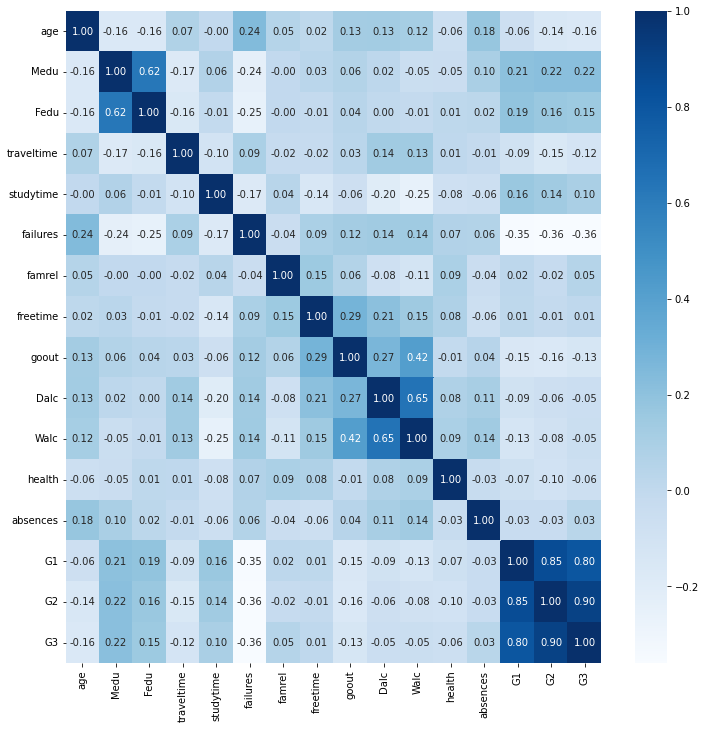

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Distribusi Data**

> Sebelum visualisasi data dilakukan data akan dipisahkan berdasarkan tipedatanya terlebih dahulu yaitu numeric dan non-numeric (category)




In [ ]:
category = []
numeric = []
for i in df.columns:
  if(df[i].dtype == 'object'):
    category.append(i)
  else:
    numeric.append(i)

print('Kolum object adalah {}'.format(category))
print('Kolum numeric adalah {}'.format(numeric))

Kolum object adalah ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'status']
Kolum numeric adalah ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


> Setelah dipisahkan akan digunakannya countplot untuk melakukan visualisasi distribusi rekord untuk setiap kolumnya. Untuk kolum yang bernilai lebih dari dua dan berbentuk kategori dapat digunakan dummy variable

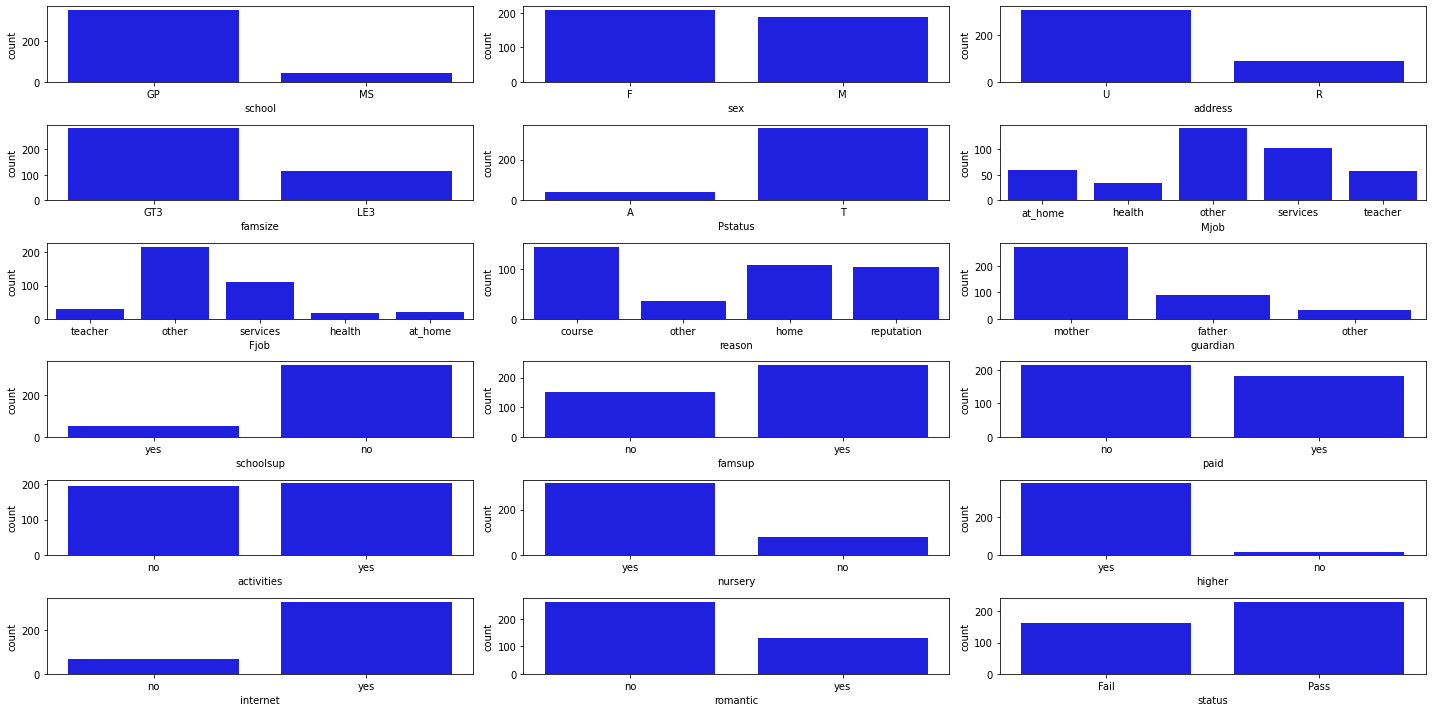

In [ ]:
plt.figure(figsize = (20,10))
for i in range (0, len(category)):
  plt.subplot(6, len(category)/6, i+1)
  sns.countplot(x = df[category[i]], color='blue')
  plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f128fba22d0>,
      dtype=object)

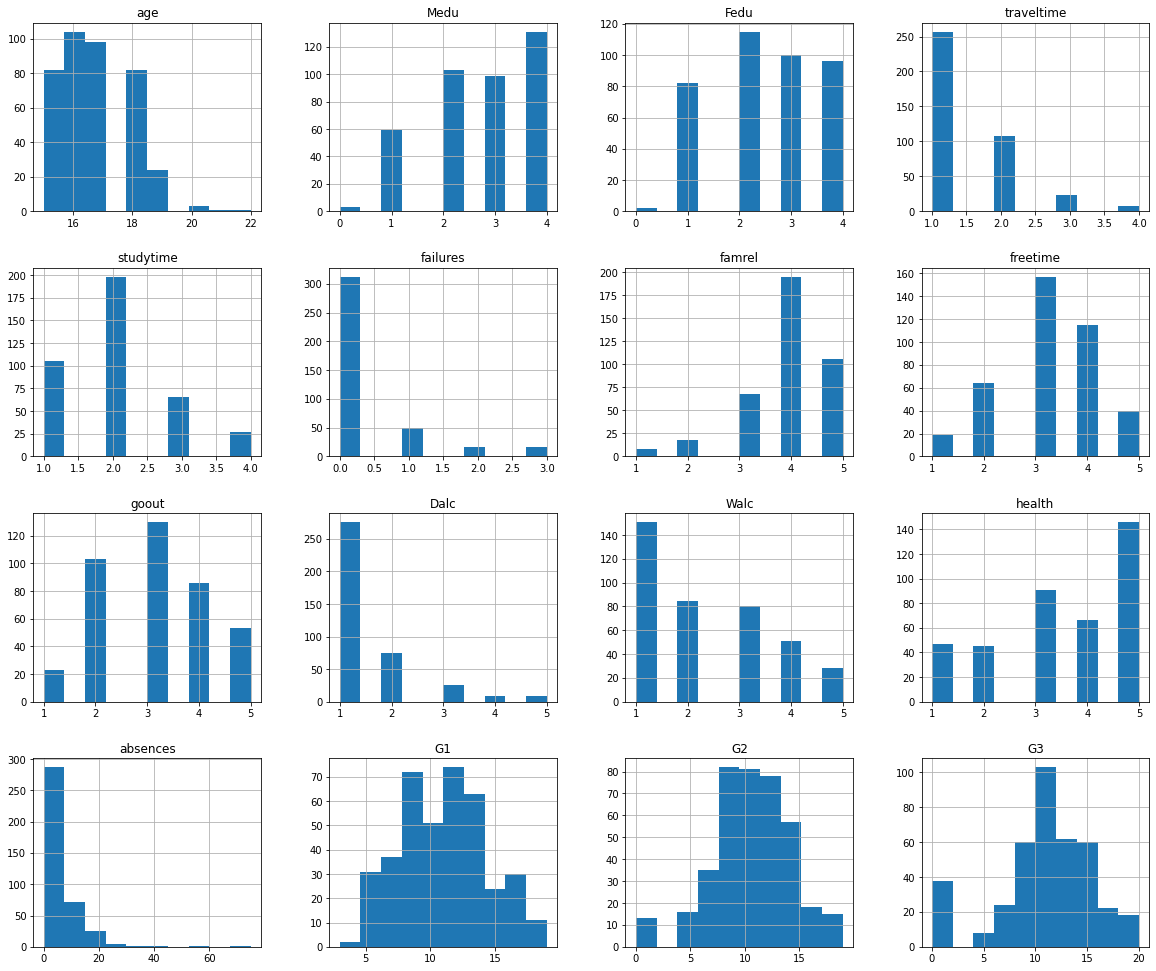

In [ ]:
df[numeric].hist(figsize=(20,17))

> Pengecekan outlier secara boxplot. Titik diluar batas interval bawah dan atas dari boxplot menunjukan letak outlier data. Hal ini dapat membantu pada saat penulis akan membersihkan outlier sehingga tidak akan berdampak pada akurasi data

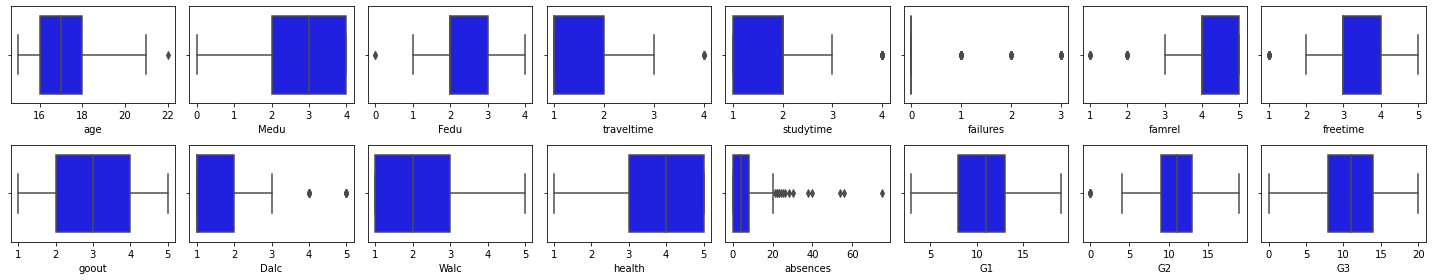

In [ ]:
plt.figure(figsize=(20,4))
for i in range (0, len(numeric)):
  plt.subplot(2, len(numeric)/2, i+1)
  sns.boxplot(x = df[numeric[i]],color='blue')
  plt.tight_layout()

# **Data Preprocessing**

> Filter outlier akan menggunakan metode IQR Score dengan mula-mula mencari nilai IQR yaitu selisih kuartil atas dengan kuartil bawah. Untuk mencari batas bawah dan batas atas maka nilai IQR akan dikalikan dengan 1.5 dan akan di kurang / ditambah dengan nilai Q1 / Q3 masing-masing.

In [ ]:
#Memilih data yang termasuk kedalam range non-outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean.shape

(232, 34)

> Dikarenakan dalam data terdapat lebih dari satu sekolah, oleh karena itu kami menggunakan kode sekolah GP saja untuk diolah

In [ ]:
data = data_clean[data_clean.school == "GP"]

> Pengecekan nilai unik untuk setiap kolum yang berpotensi untuk dibuatkan kolum dummynya

In [ ]:
for i in data.columns:
  if(len(data[i].unique()) > 1 and data[i].dtype not in ['int64','float64']):
    print("Kolum {} memiliki nilai unik: {} \n".format(i,data[i].unique()))

Kolum sex memiliki nilai unik: ['F' 'M'] 

Kolum address memiliki nilai unik: ['U' 'R'] 

Kolum famsize memiliki nilai unik: ['GT3' 'LE3'] 

Kolum Pstatus memiliki nilai unik: ['A' 'T'] 

Kolum Mjob memiliki nilai unik: ['at_home' 'health' 'other' 'services' 'teacher'] 

Kolum Fjob memiliki nilai unik: ['teacher' 'other' 'services' 'health' 'at_home'] 

Kolum reason memiliki nilai unik: ['course' 'home' 'reputation' 'other'] 

Kolum guardian memiliki nilai unik: ['mother' 'father' 'other'] 

Kolum schoolsup memiliki nilai unik: ['yes' 'no'] 

Kolum famsup memiliki nilai unik: ['no' 'yes'] 

Kolum paid memiliki nilai unik: ['no' 'yes'] 

Kolum activities memiliki nilai unik: ['no' 'yes'] 

Kolum nursery memiliki nilai unik: ['yes' 'no'] 

Kolum higher memiliki nilai unik: ['yes' 'no'] 

Kolum internet memiliki nilai unik: ['no' 'yes'] 

Kolum romantic memiliki nilai unik: ['no' 'yes'] 

Kolum status memiliki nilai unik: ['Fail' 'Pass'] 



> Setelah itu kami akan melakukan drop kolum yang tidak digunakan sebagai parameter

In [ ]:
drop_columns = ['Medu','Fedu','school','sex','age','address','famsize','Mjob','activities',
                'Fjob','reason','guardian','traveltime','Pstatus',
                'schoolsup','nursery','internet','romantic','higher',
                'freetime','goout','Dalc','Walc','failures','health','G2','G3']

data = data.drop(drop_columns, axis=1)



> Menentukan field yang akan digunakan dari data awal untuk pembentukan model


In [ ]:
dummies_columns = []
for i in data.columns:
  try:
    if(data[i].dtype != 'int64' and i!='status'): 
      data[i] = pd.Categorical(data[i], categories=data[i].unique())
      dummies_columns.append(i)
    else:
      print("No dummies column created")
  except:
    print("An exception occured or no columns found")
try:
  data = pd.get_dummies(data, columns=dummies_columns)
except:
  print("An exception occurred")

No dummies column created
No dummies column created
No dummies column created
No dummies column created
No dummies column created


> Mengkonversikan field yang memiliki 2 nilai string menjadi nilai binari dan mengganti nilai 'yes' dan 'no' menjadi nilai binari sehingga tidak bermasalah pada saat pembentukan model. Dikarenakan kolum status akan dijadikan variable dependent dalam pemelajaran mesin ini dan kolum tersebut memiliki nilai object 'Fail' dan 'Pass' maka akan dikonversikan menjadi nilai numerik dengan menggunakan label encoder. Secara manual hal ini dapat dilakukan dengan menggunakan .replace()



In [ ]:
#Inisialisasi encoder
le = LabelEncoder()
  
#Konversi nilai string pada kolum status
data['result'] = le.fit_transform(data['status'])
data = data.drop(['status'],axis=1)

In [ ]:
data.head() 

,studytime,famrel,absences,G1,famsup_no,famsup_yes,paid_no,paid_yes,result
0,2,4,6,5,1,0,1,0,0
1,2,5,4,5,0,1,1,0,0
3,3,3,2,15,0,1,0,1,1
4,2,4,4,6,0,1,0,1,0
5,2,5,10,15,0,1,0,1,1


In [ ]:
data.describe()

,studytime,famrel,absences,G1,famsup_no,famsup_yes,paid_no,paid_yes,result
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,1.966019,4.135922,4.126214,11.665049,0.339806,0.660194,0.504854,0.495146,0.694175
std,0.687030,0.692095,4.450661,3.093572,0.474797,0.474797,0.501194,0.501194,0.461879
min,1.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,4.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,2.000000,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,5.000000,6.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,5.000000,20.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Melakukan normalisasi nilai non-kategorikal menjadi nilai dalam interval -1 sampai 1 dengan menggunakan MinMaxScaler dan feature_range(-1, 1)

In [ ]:
# mm = MinMaxScaler(feature_range=[0,3])
# def scaled_dataframe(data):
#   column_scaled = []
#   # transform data
#   for i in data.columns:
#     if(data[i].max() != 3 and i != 'result'):
#       column_scaled.append(i)
  
#   return column_scaled


# column_scaled = scaled_dataframe(data)
# data[column_scaled] = mm.fit_transform(data[column_scaled])
# print(data.describe())
# print(data.shape)



> Memisahkan data independen(x) dan data dependen(y)



In [ ]:
data.shape

(206, 9)

In [ ]:
data.head()

,studytime,famrel,absences,G1,famsup_no,famsup_yes,paid_no,paid_yes,result
0,2,4,6,5,1,0,1,0,0
1,2,5,4,5,0,1,1,0,0
3,3,3,2,15,0,1,0,1,1
4,2,4,4,6,0,1,0,1,0
5,2,5,10,15,0,1,0,1,1


In [ ]:
x = data.iloc[:,:data.shape[1]-1]
y = data.iloc[:,data.shape[1]-1] 
y.head()

0    0
1    0
3    1
4    0
5    1
Name: result, dtype: int64



> Pembagian data untuk training data dan data testing dengan data test sebesar 35%



In [ ]:
#Splitting Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(133, 8)
(133,)
(73, 8)
(73,)


# **Model Building & Testing**



> Disini akan dilakukan inisialisasi model SVM SVC (Support Vector Classifier) dengan kernel rbf. Hal ini dikarenakan pemelajaran dataset ini menggunakan banyak dimensi (lebih dari satu)

> Setelah inisialisasi, maka sample train yang telah dibuat akan digunakan untuk pelatihan model



In [ ]:
# Inisialisasi SVM
svc = svm.SVC(C=1.0, kernel='rbf', random_state=0, class_weight='balanced')
print(svc)

SVC(class_weight='balanced', random_state=0)


In [ ]:
fitting = svc.fit(x_train, y_train)



> Setelah dilakukan inisialisasi konfigurasi algoritma dan membuat model dari data yang telah dibuat, maka akan dilakukan test prediksi berdasarkan model tersebut serta uji evaluasi kinerja model terhadap test



In [ ]:
# Hasil prediksi
y_predict = svc.predict(x_test)

# Perhitungan evaluasi training data
print("Train Accuracy score:", svc.score(x_train, y_train))

# Perhitungan evaluasi data data
print("Test Accuracy score :", svc.score(x_test, y_test))

Train Accuracy score: 0.8947368421052632
Test Accuracy score : 0.8493150684931506


In [ ]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0])

In [ ]:
print("Classification Performance Result  \n",metrics.classification_report(y_test, y_predict),"\n")

Classification Performance Result  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        22
           1       1.00      0.78      0.88        51

    accuracy                           0.85        73
   macro avg       0.83      0.89      0.84        73
weighted avg       0.90      0.85      0.86        73
 



> Pengecekan jumlah kesalahan yang terjadi antara nilai prediksi dengan nilai aktual dapat menggunakan confusion matrix

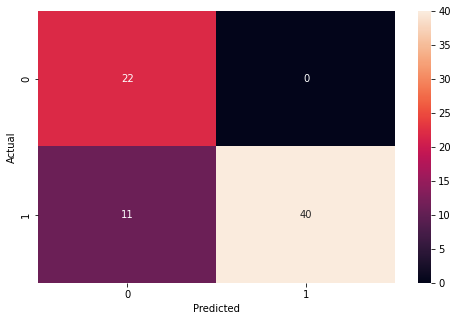

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

> Akan dilakukannya visualisasi radial bagi data test dan data hasil prediksi untuk melihat penyebaran dan efek masing-masing dependent variable terhadap data

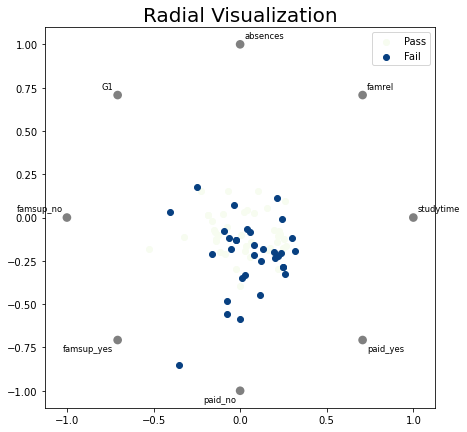

In [ ]:
fig,ax = plt.subplots(figsize = (7,7))
new_df = x_test.copy()
new_df["status"] = le.inverse_transform(y_predict)
radviz(new_df,"status",ax = ax,colormap = "GnBu")
plt.title('Radial Visualization',fontsize = 20)
plt.show()

> Untuk visualisasi hyperplane akan menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi lebih dari 3 menjadi 2 dimensi. Ini akan memudahkan kami dalam mempresentasikan hasil garis keputusan pada model yang telah dilatih

> Mula-mula PCA akan diinisialisasikan dengan jumlah komponen 2 untuk mereduksi dimensi menjadi 2 dimensi / fitur. Setelah itu akan ditransformasikannya data x_train yang akan dimasukan kedalam variable pca 2 dimensi.

> Setelah itu akan dilakukannya inisialisasi model yang dikhususkan untuk pca ini berdasarkan parameter yang digunakan. 

> Setelah itu akan dilakukan looping untuk setiap nilai pada variable pca 2 dimensi berdasarkan klasifikasi y_train

> Pemisahan plot tersebut akan dikategorikan sebagai Fail dan Pass



> RBF

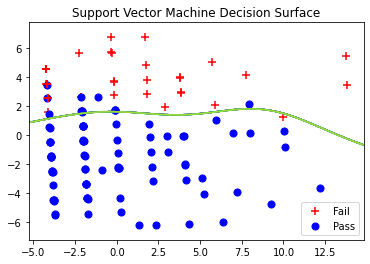

In [ ]:
from sklearn.decomposition import PCA
import pylab as pl

#Pengubahan dimensi fitur x_train menjadi 2 dimensi
pca_2d = PCA(n_components=2).fit_transform(x_train)

#Inisialisasi dan pelatihan model yang digunakan untuk visualisasi hyperplane
svc_pca = svm.SVC(C=1.0, kernel='rbf', random_state=0, class_weight='balanced').fit(pca_2d, y_train)
i = 0
y_train_visual = le.inverse_transform(y_train)
for count in y_train_visual:
  if(count == 'Fail'): #Tidak Lulus
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',s=50,marker='+')
  elif(count == 'Pass'): #lulus
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',s=50,marker='o')
  i+= 1

pl.legend([c1, c2], ['Fail', 'Pass'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svc_pca.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('on')
pl.show()

> Linear

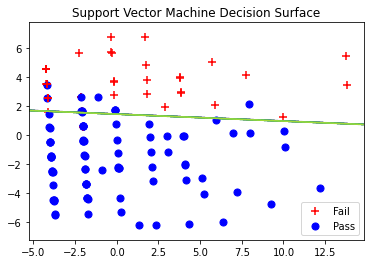

In [ ]:
#Pengubahan dimensi fitur x_train menjadi 2 dimensi
pca_2d = PCA(n_components=2).fit_transform(x_train)

#Inisialisasi dan pelatihan model yang digunakan untuk visualisasi hyperplane
svc_pca = svm.SVC(C=1.0, kernel='linear', random_state=0, class_weight='balanced').fit(pca_2d, y_train)
i = 0
for count in y_train_visual:
  if(count == 'Fail'): #Tidak Lulus
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',s=50,marker='+')
  elif(count == 'Pass'): #lulus
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',s=50,marker='o')
  i+= 1

pl.legend([c1, c2], ['Fail', 'Pass'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svc_pca.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('on')
pl.show()

# **Percobaan klasifikasi data baru untuk mendapatkan keputusan yang diinginkan**

> Percobaan klasifikasi data baru dengan mendeklarasikan dataframe baru

In [ ]:
x_train.describe()

,studytime,famrel,absences,G1,famsup_no,famsup_yes,paid_no,paid_yes
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.924812,4.172932,4.007519,11.714286,0.338346,0.661654,0.481203,0.518797
std,0.713761,0.690973,4.238168,3.211182,0.474936,0.474936,0.501536,0.501536
min,1.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,2.000000,12.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,5.000000,6.000000,14.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,5.000000,18.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
new_data_df= pd.DataFrame({
    	'studytime':[3,2,1,2,2,3],
      'famrel':[3,4,3,2,1,5],
      'absences':[4,5,1,8,9,4],
      'G1':[11,10,5,3,15,19],
      'famsup_no':[0,0,0,1,1,1],
      'famsup_yes':[1,1,1,0,0,0],
      'paid_no':[1,0,1,0,1,0],
      'paid_yes':[0,1,0,1,0,1],
})

> Data baru akan diprediksi untuk mendapatkan hasil klasifikasinya

> Prediksi probabilitas juga akan diambil.
Catatan: Hasil probabilitas prediksi dengan hasil prediksi aslinya memiliki kemungkinan untuk berbeda

In [ ]:
new_predict = svc.predict(new_data_df)
print("Kemungkinan kelulusan {} siswa adalah {}".format(len(new_predict),le.inverse_transform(new_predict))) 

Kemungkinan kelulusan 6 siswa adalah ['Pass' 'Fail' 'Fail' 'Fail' 'Pass' 'Pass']


> Kami menambahkan hasil prediksi kedalam dataframe new_data_df sehingga dapat dievaluasi pada saat ditampilkan

In [ ]:
new_data_df['Status'] = le.inverse_transform(new_predict)
new_data_df.head()

,studytime,famrel,absences,G1,famsup_no,famsup_yes,paid_no,paid_yes,Status
0,3,3,4,11,0,1,1,0,Pass
1,2,4,5,10,0,1,0,1,Fail
2,1,3,1,5,0,1,1,0,Fail
3,2,2,8,3,1,0,0,1,Fail
4,2,1,9,15,1,0,1,0,Pass


# **Pemograman Parallel Percepatan Parallelisme GridSearchCV**

> Multiprocessing dan Multithreading dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# from joblib import parallel_backend
from sklearn.utils import parallel_backend
import time
import os

In [ ]:
PROCESS = os.cpu_count()
print(PROCESS)

2


In [ ]:
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','poly','sigmoid','linear'],
              'random_state':[0], 
              'class_weight':['balanced']
}
cv = 10

svc_hp = GridSearchCV(svm.SVC(),param_grid,n_jobs=None, cv=cv)

start_ms = time.perf_counter() * 1000
svc_hp.fit(x_train,y_train)

print("Best params : {}".format(svc_hp.best_params_))
print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
serial_time = end_ms - start_ms
print("Total time {} ms".format(serial_time))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 19463.055254000006 ms


In [ ]:
#Parallel execution dengan n_jobs
svc_hp = GridSearchCV(svm.SVC(),param_grid, n_jobs=-1, cv=cv)
start_ms = time.perf_counter() * 1000
svc_hp.fit(x_train,y_train)
print("Best params : {}".format(svc_hp.best_params_))
print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))
end_ms = time.perf_counter() * 1000
parallel_time_grid = end_ms - start_ms
print("Total time {} ms".format(parallel_time_grid))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 18289.28542500001 ms


In [ ]:
#Parallel execution dengan menggunakan parallel_backend multiprocessing
svc_hp = GridSearchCV(svm.SVC(),param_grid, n_jobs=-1, cv=cv)
start_ms = time.perf_counter() * 1000
with parallel_backend('multiprocessing', n_jobs=-1):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_multiprocess_time = end_ms - start_ms
print("Total time {} ms".format(parallel_multiprocess_time))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 16676.862316999934 ms


In [ ]:
#Parallel execution dengan menggunakan parallel_backend multithreading
svc_hp = GridSearchCV(svm.SVC(),param_grid, n_jobs=-1, cv=cv)
start_ms = time.perf_counter() * 1000
with parallel_backend('threading', n_jobs=4*PROCESS):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_threading_time = end_ms - start_ms
print("Total time {} ms".format(parallel_threading_time))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 18765.895929000108 ms


> Dask

In [ ]:
%pip install "dask[distributed]"

In [ ]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,n_workers=1, memory_limit='2GB')

/usr/local/lib/python3.7/dist-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44601 instead
  http_address["port"], self.http_server.port


In [ ]:
svc_hp = GridSearchCV(svm.SVC(),param_grid, n_jobs=-1, cv=cv)

start_ms = time.perf_counter() * 1000
with parallel_backend('dask'):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_dask_time = end_ms - start_ms
print("Total time {} ms".format(parallel_dask_time))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 36098.36677199998 ms


In [ ]:
client = Client(processes=True, n_workers=PROCESS, memory_limit='2GB')

/usr/local/lib/python3.7/dist-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40475 instead
  http_address["port"], self.http_server.port


In [ ]:
svc_hp = GridSearchCV(svm.SVC(),param_grid, n_jobs=-1, cv=cv)

start_ms = time.perf_counter() * 1000
with parallel_backend('dask'):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_dask_mp_time = end_ms - start_ms
print("Total time {} ms".format(parallel_dask_mp_time))

Best params : {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}
Accuracy of training: 0.924812030075188 and testing: 0.9178082191780822
Total time 43488.146532999934 ms


> Speedup dan Efisiensi

In [ ]:
speed_up_gridsearch = serial_time / parallel_time_grid
speed_up_process = serial_time / parallel_multiprocess_time
speed_up_thread  = serial_time / parallel_threading_time
# speed_up_spark = serial_time / parallel_spark_time
speed_up_dask = serial_time / parallel_dask_time
speed_up_dask_mp = serial_time / parallel_dask_mp_time
efficiency = 100*(serial_time/parallel_multiprocess_time)/PROCESS
print("Efficiency Multiprocessing : {}%".format(round(efficiency,1)))
print("Speed up GridSearchCV : {}".format(speed_up_gridsearch))
print("Speed up multithreading : {}".format(speed_up_thread))
print("Speed up multiprocessing : {}".format(speed_up_process))
# print("Speed up spark : {}".format(speed_up_spark))
print("Speed up dask threading : {}".format(speed_up_dask))
print("Speed up dask processing : {}".format(speed_up_dask_mp))

Efficiency Multiprocessing : 58.4%
Speed up GridSearchCV : 1.0641780037723916
Speed up multithreading : 1.0371503352484512
Speed up multiprocessing : 1.1670693733652706
Speed up dask threading : 0.5391671976998333
Speed up dask processing : 0.4475485116209985


> Berdasarkan performa penggunaan Google Colab dalam pengujian percepatan hypertuning parameter dengan menggunakan GridSearchCV, ditemukan bahwa metode dengan performa terbaik merupakan metode multiprocessing dengan besar speed up 1.17 yang menghasilkan efisiensi penggunaan processor sebesar 58,4% yang diikuti dengan parallelisme GridSearchCV sebesar 1.06

> Berdasarkan komputer local RAM 4GB, i5-8250u didapatkan multithreading sebagai teknik yang terbaik dengan speed up sebesar 2.14 yang diikuti oleh dask threading sebesar 1.41

# **Parallelisasi RandomizeSearch**

> Serial Execution

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','poly','sigmoid','linear'],
              'random_state':[0], 
              'class_weight':['balanced']
}
cv = 10

svc_hp = RandomizedSearchCV(svm.SVC(),param_grid,n_jobs=None, cv=cv)

start_ms = time.perf_counter() * 1000
svc_hp.fit(x_train,y_train)

print("Best params : {}".format(svc_hp.best_params_))
print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
serial_time = end_ms - start_ms
print("Total time {} ms".format(serial_time))


Best params : {'random_state': 0, 'kernel': 'linear', 'gamma': 1, 'class_weight': 'balanced', 'C': 0.1}
Accuracy of training: 0.9172932330827067 and testing: 0.9041095890410958
Total time 2015.4872109997086 ms


> Parallel RandomizeSearch

In [ ]:
svc_hp = RandomizedSearchCV(svm.SVC(),param_grid,n_jobs=-1, cv=cv)

start_ms = time.perf_counter() * 1000
svc_hp.fit(x_train,y_train)
print("Best params : {}".format(svc_hp.best_params_))
print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_time_randomized = end_ms - start_ms
print("Total time {} ms".format(parallel_time_randomized))

Best params : {'random_state': 0, 'kernel': 'sigmoid', 'gamma': 0.001, 'class_weight': 'balanced', 'C': 100}
Accuracy of training: 0.9172932330827067 and testing: 0.9041095890410958
Total time 1480.0601170000155 ms


> Parallel Backend Threading

In [ ]:
svc_hp = RandomizedSearchCV(svm.SVC(),param_grid,n_jobs=-1, cv=cv)

start_ms = time.perf_counter() * 1000
with parallel_backend('threading', n_jobs=4*PROCESS):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_threading_time = end_ms - start_ms
print("Total time {} ms".format(parallel_threading_time))

Best params : {'random_state': 0, 'kernel': 'poly', 'gamma': 0.001, 'class_weight': 'balanced', 'C': 1000}
Accuracy of training: 0.924812030075188 and testing: 0.8904109589041096
Total time 1848.6350840001833 ms


> Parallel Backend Multiprocessing

In [ ]:
svc_hp = RandomizedSearchCV(svm.SVC(),param_grid,n_jobs=-1, cv=cv)

start_ms = time.perf_counter() * 1000
with parallel_backend('multiprocessing', n_jobs=-1):
  svc_hp.fit(x_train,y_train)
  print("Best params : {}".format(svc_hp.best_params_))
  print("Accuracy of training: {} and testing: {}".format(svc_hp.score(x_train,y_train), svc_hp.score(x_test,y_test)))

end_ms = time.perf_counter() * 1000
parallel_multiprocess_time = end_ms - start_ms
print("Total time {} ms".format(parallel_multiprocess_time))

Best params : {'random_state': 0, 'kernel': 'sigmoid', 'gamma': 0.0001, 'class_weight': 'balanced', 'C': 100}
Accuracy of training: 0.8872180451127819 and testing: 0.8767123287671232
Total time 2778.5026650000364 ms


In [ ]:
speed_up_randomizesearch = serial_time / parallel_time_randomized
speed_up_process = serial_time / parallel_multiprocess_time
speed_up_thread  = serial_time / parallel_threading_time
efficiency = 100*(serial_time/parallel_multiprocess_time)/PROCESS
print("Efficiency Multiprocessing : {}%".format(round(efficiency,1)))
print("Speed up RandomizeSearch : {}".format(speed_up_randomizesearch))
print("Speed up multithreading : {}".format(speed_up_thread))
print("Speed up multiprocessing : {}".format(speed_up_process))

Efficiency Multiprocessing : 36.3%
Speed up RandomizeSearch : 1.3617603689537752
Speed up multithreading : 1.0902569297984332
Speed up multiprocessing : 0.7253860996385556


> Berdasarkan test diatas ditemukan bahwa percepatan metode randomized terbaik menggunakan built-in parallelisme RandomizedSearch dengan menggunakan parallel backend sebesar 1.36 speedup. Posisi kedua ialah multithreading sebesar 1.09

# **Multiprocessing dan Threading Lib Python**

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
#Serial
model_performance = {}
count = 0
def hypertunning(C, G, K, randomState, classWeight):

  svc = svm.SVC(C=C, gamma=G, kernel=K, random_state=randomState, class_weight=classWeight)
  svc.fit(x_train, y_train)
  score = cross_val_score(svc, x_test, y_test, cv=10)
  global model_performance
  global count
  model_performance.update({
      "{}".format(count):{
          "model":svc,
          "validate_score_test":score,
          "train_test_score":svc.score(x_train, y_train)
      }
  })
  count+=1

def extract_model(dict_performance):
    list_train_score = []
    list_test_score = []
    list_svc_model = []
    for i in dict_performance.keys():
      list_svc_model.append(dict_performance[i]['model'])
      list_test_score.append(mean(dict_performance[i]['validate_score_test']))
      list_train_score.append(dict_performance[i]['train_test_score'])
    
    return list_train_score, list_test_score, list_svc_model;

def best_model(dict_performance):
  list_train_score, list_test_score, list_svc_model = extract_model(dict_performance)
  max_score = max(list_train_score)
  max_index = list_train_score.index(max_score)
  best_model = list_svc_model[max_index]
  best_model_test = list_test_score[max_index]

  return best_model, max_score, best_model_test


if __name__ =="__main__":
  start_ms = time.perf_counter() * 1000
  C = [0.1,1,10,100,1000]
  gamma = [1,0.1,0.01,0.001,0.0001]
  kernel = ['rbf','poly','sigmoid','linear']
  random_state = 0
  class_weight = 'balanced'
  for c in C:
    for g in gamma:
      for k in kernel:
        hypertunning(c, g, k, random_state, class_weight)

  best_params, best_score, best_test_score = best_model(model_performance)
  print("Best params {}".format(best_params))
  print("Train accuracy {}".format(best_score))
  print("Test accuracy {}".format(best_test_score))

  end_ms = time.perf_counter() * 1000
  serial_time = end_ms - start_ms
  print("Total serial execution time {} ms".format(end_ms - start_ms))

Best params SVC(C=1, class_weight='balanced', gamma=1, kernel='poly', random_state=0)
Train accuracy 1.0
Test accuracy 0.8482142857142857
Total serial execution time 33366.467376000015 ms


In [ ]:
#Multiprocessing
from multiprocessing import Process, Manager
count = 0
def hypertunning(C, G, K, randomState, classWeight, data_dict):

  svc = svm.SVC(C=C, gamma=G, kernel=K, random_state=randomState, class_weight=classWeight)
  svc.fit(x_train, y_train)
  score = cross_val_score(svc, x_test, y_test, cv=10)
  global model_performance
  global count
  data_dict.update({
      "{}".format(count):{
          "model":svc,
          "validate_score_test":score,
          "train_test_score":svc.score(x_train, y_train)
      }
  })
  count+=1

def extract_model(dict_performance):
    list_train_score = []
    list_test_score = []
    list_svc_model = []
    for i in dict_performance.keys():
      list_svc_model.append(dict_performance[i]['model'])
      list_test_score.append(mean(dict_performance[i]['validate_score_test']))
      list_train_score.append(dict_performance[i]['train_test_score'])
    
    return list_train_score, list_test_score, list_svc_model;

def best_model(dict_performance):
  list_train_score, list_test_score, list_svc_model = extract_model(dict_performance)
  max_score = max(list_train_score)
  max_index = list_train_score.index(max_score)
  best_model = list_svc_model[max_index]
  best_model_test = list_test_score[max_index]

  return best_model, max_score, best_model_test


if __name__ =="__main__":
  list_p = []
  start_ms = time.perf_counter() * 1000
  manager = Manager()
  model_performance = manager.dict({})
  C = [0.1,1,10,100,1000]
  gamma = [1,0.1,0.01,0.001,0.0001]
  kernel = ['rbf','poly','sigmoid','linear']
  random_state = 0
  class_weight = 'balanced'
  for c in C:
    for g in gamma:
      for k in kernel:
        p = Process(target = hypertunning, args=(c, g, k, random_state, class_weight, model_performance))
        p.start()
        list_p.append(p)
  
  for process in list_p:
    process.join()

  best_params, best_score, best_test_score = best_model(model_performance)
  print("Best params {}".format(best_params))
  print("Train accuracy {}".format(best_score))
  print("Test accuracy {}".format(best_test_score))

  end_ms = time.perf_counter() * 1000
  multiprocessing_process = end_ms - start_ms
  print("Total parallel multiprocessing execution time {} ms".format(multiprocessing_process))

Best params SVC(C=1000, class_weight='balanced', gamma=0.0001, kernel='linear',
    random_state=0)
Train accuracy 0.9172932330827067
Test accuracy 0.9035714285714286
Total parallel multiprocessing execution time 19020.67875799979 ms


> Pool

In [ ]:
from multiprocessing import Pool

#Pool
model_performance = {}
count = 0
def hypertunning(C, G, K, randomState, classWeight, data_dict):

  svc = svm.SVC(C=C, gamma=G, kernel=K, random_state=randomState, class_weight=classWeight)
  svc.fit(x_train, y_train)
  score = cross_val_score(svc, x_test, y_test, cv=10)
  global model_performance
  global count
  data_dict.update({
      "{}".format(count):{
          "model":svc,
          "validate_score_test":score,
          "train_test_score":svc.score(x_train, y_train)
      }
  })
  count+=1

def extract_model(dict_performance):
    list_train_score = []
    list_test_score = []
    list_svc_model = []
    for i in dict_performance.keys():
      list_svc_model.append(dict_performance[i]['model'])
      list_test_score.append(mean(dict_performance[i]['validate_score_test']))
      list_train_score.append(dict_performance[i]['train_test_score'])
    
    return list_train_score, list_test_score, list_svc_model;

def best_model(dict_performance):
  list_train_score, list_test_score, list_svc_model = extract_model(dict_performance)
  max_score = max(list_train_score)
  max_index = list_train_score.index(max_score)
  best_model = list_svc_model[max_index]
  best_model_test = list_test_score[max_index]

  return best_model, max_score, best_model_test


if __name__ =="__main__":
  manager = Manager()
  model_performance = manager.dict({})
  start_ms = time.perf_counter() * 1000
  C = [0.1,1,10,100,1000]
  gamma = [1,0.1,0.01,0.001,0.0001]
  kernel = ['rbf','poly','sigmoid','linear']
  random_state = 0
  class_weight = 'balanced'
  with Pool(PROCESS) as p:
    for c in C:
      for g in gamma:
        for k in kernel:
          p.starmap(hypertunning, [(c, g, k, random_state, class_weight, model_performance)])

  best_params, best_score, best_test_score = best_model(model_performance)
  print("Best params {}".format(best_params))
  print("Train accuracy {}".format(best_score))
  print("Test accuracy {}".format(best_test_score))

  end_ms = time.perf_counter() * 1000
  multiprocessing_pool = end_ms - start_ms
  print("Total multiprocessing pool execution time {} ms".format(multiprocessing_pool))

Best params SVC(C=1, class_weight='balanced', gamma=1, kernel='poly', random_state=0)
Train accuracy 1.0
Test accuracy 0.8482142857142857
Total multiprocessing pool execution time 15420.692235999973 ms


In [ ]:
import threading
#Multithreading
model_performance = {}
count = 0
def hypertunning(C, G, K, randomState, classWeight):

  svc = svm.SVC(C=C, gamma=G, kernel=K, random_state=randomState, class_weight=classWeight)
  svc.fit(x_train, y_train)
  score = cross_val_score(svc, x_test, y_test, cv=10)
  global model_performance
  global count
  model_performance.update({
      "{}".format(count):{
          "model":svc,
          "validate_score_test":score,
          "train_test_score":svc.score(x_train, y_train)
      }
  })
  count+=1

def extract_model(dict_performance):
    list_train_score = []
    list_test_score = []
    list_svc_model = []
    for i in dict_performance.keys():
      list_svc_model.append(dict_performance[i]['model'])
      list_test_score.append(mean(dict_performance[i]['validate_score_test']))
      list_train_score.append(dict_performance[i]['train_test_score'])
    
    return list_train_score, list_test_score, list_svc_model;

def best_model(dict_performance):
  list_train_score, list_test_score, list_svc_model = extract_model(dict_performance)
  max_score = max(list_train_score)
  max_index = list_train_score.index(max_score)
  best_model = list_svc_model[max_index]
  best_model_test = list_test_score[max_index]

  return best_model, max_score, best_model_test


if __name__ =="__main__":
  list_t = []
  start_ms = time.perf_counter() * 1000
  C = [0.1,1,10,100,1000]
  gamma = [1,0.1,0.01,0.001,0.0001]
  kernel = ['rbf','poly','sigmoid','linear']
  random_state = 0
  class_weight = 'balanced'
  for c in C:
    for g in gamma:
      for k in kernel:
        t = threading.Thread(target=hypertunning, args=(c, g, k, random_state, class_weight))
        t.start()
        list_t.append(t)
  
  for thread in list_t:
    thread.join()

  best_params, best_score, best_test_score = best_model(model_performance)
  print("Best params {}".format(best_params))
  print("Train accuracy {}".format(best_score))
  print("Test accuracy {}".format(best_test_score))

  end_ms = time.perf_counter() * 1000
  multithreading = end_ms - start_ms
  print("Total parallel multithreading execution time {} ms".format(multithreading))

Best params SVC(C=1, class_weight='balanced', gamma=1, kernel='poly', random_state=0)
Train accuracy 1.0
Test accuracy 0.8482142857142857
Total parallel multithreading execution time 15268.433284000028 ms


In [ ]:
speed_multithreading = serial_time /  multithreading
speed_multiprocessing = serial_time / multiprocessing_process
speed_multiprocessing_pool = serial_time /  multiprocessing_pool
efficiency_mp = 100*(serial_time/multiprocessing_process)/PROCESS
efficiency_pl = 100*(serial_time/multiprocessing_pool)/PROCESS
print("Efficiency Process : {}% | Pool : {}%".format(round(efficiency_mp,1), round(efficiency_pl,1)))
print("Speedup Multithreading | Multiprocessing | Pool are {} | {} | {}".format(speed_multithreading,speed_multiprocessing,speed_multiprocessing_pool))

Efficiency Process : 87.7% | Pool : 108.2%
Speedup Multithreading | Multiprocessing | Pool are 2.1853235859480837 | 1.7542206458834502 | 2.163746404205202


# **Referensi Parallel**
* https://joblib.readthedocs.io/en/latest/parallel.html
* https://docs.python.org/3/library/multiprocessing.html
* https://realpython.com/intro-to-python-threading/
* https://stackoverflow.com/questions/1559125/string-arguments-in-python-multiprocessing